In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


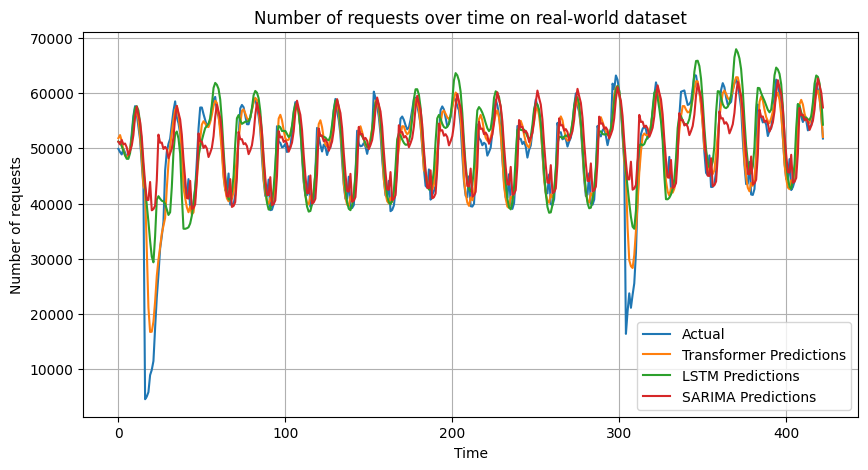

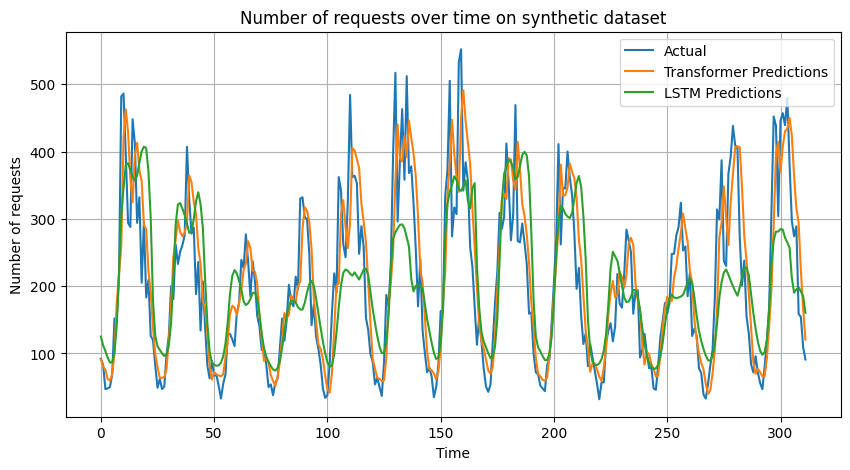

In [9]:
import matplotlib.pyplot as plt
import pandas as pd


df_actual_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results/actual_test_results.csv')
df_actual_synth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results/actual_synthetic_results.csv')

df_LSTM_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results/LSTM_test_results.csv')
df_LSTM_synth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results/LSTM_synthetic_results.csv')

df_TST_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results/transformer_test_results.csv')
df_TST_synth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results/transformer_synthetic_results.csv')

df_SARIMA_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results/SARIMA_test_results.csv')
df_SARIMA_synth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results/SARIMA_synthetic_results.csv')

df_SARIMA_test = df_SARIMA_test.iloc[4:].copy()


# Align the dataframes to the same length just in case
min_len = min(len(df_TST_test), len(df_LSTM_test), len(df_actual_test), len(df_SARIMA_test))
actual_data_test = df_actual_test['Actual'][:min_len].reset_index(drop=True)
transformer_data_test = df_TST_test['predictions'][:min_len].reset_index(drop=True)
lstm_data_test = df_LSTM_test['Predicted'][:min_len].reset_index(drop=True)
sarima_data_test = df_SARIMA_test['Predicted'][:min_len].reset_index(drop=True)

# Plot 1: Line plot of both predictions over the index
plt.figure(figsize=(10, 5))
plt.plot(df_actual_test['Actual'], label='Actual')
plt.plot(transformer_data_test, label='Transformer Predictions')
plt.plot(lstm_data_test, label='LSTM Predictions')
plt.plot(sarima_data_test, label='SARIMA Predictions')
plt.title('Number of requests over time on real-world dataset')
plt.xlabel('Time')
plt.ylabel('Number of requests')
plt.legend()
plt.grid(True)
plt.show()


# Align the dataframes to the same length just in case
min_len = min(len(df_TST_synth), len(df_LSTM_synth), len(df_actual_synth), len(df_SARIMA_synth))
actual_data_synth = df_actual_synth['Actual'][:min_len].reset_index(drop=True)
transformer_data_synth = df_TST_synth['predictions'][:min_len].reset_index(drop=True)
lstm_data_synth = df_LSTM_synth['Predicted'][:min_len].reset_index(drop=True)
sarima_data_synth = df_SARIMA_synth['Predicted'][:min_len].reset_index(drop=True)

# Plot 2: Line plot of both predictions over the index
plt.figure(figsize=(10, 5))
plt.plot(df_actual_synth['Actual'], label='Actual')
plt.plot(transformer_data_synth, label='Transformer Predictions')
plt.plot(lstm_data_synth, label='LSTM Predictions')
#plt.plot(df_SARIMA_synth['Predicted'], label='SARIMA Predictions')
plt.title('Number of requests over time on synthetic dataset')
plt.xlabel('Time')
plt.ylabel('Number of requests')
plt.legend()
plt.grid(True)
plt.show()